# Introduction

Bitcoin is a digital currency, and its transactions are recorded on the Bitcoin blockchain, a decentralized ledger. The process of verifying these transactions is known as mining. Bitcoin mining essentially boils down to finding a specific number that, when combined with other data, creates a hash (a unique string of characters) that is smaller than a target set by the network. This task is incredibly challenging and requires a significant amount of computational power (and/or luck), which is why Bitcoin is labelled "Proof of Work (PoW)."

When a valid hash is found, it results in a "block" (a collection of transactions) being added to the blockchain. The difficulty of finding this hash prevents malicious actors from inserting invalid blocks. Miners, who are often part of a mining pool, are rewarded with Bitcoin for successfully adding a block to the blockchain. This is where the concept of halvings comes into play.

Every 210,000 block, or roughly every four years (as the difficulty of finding a value hash is adjusted to ensure a new block is added approximately every 10 minutes), the reward for adding a block is halved. These events are known as Bitcoin halvings, and they have historically marked the beginning of regular "4-year Bitcoin cycles."

---------------------

In this project, we will study Bitcoin, and other cryptocurrencies, in more detail. In part 1 we will analyse Bitcoin price at various points into each cycle, and try to spot any patterns between price and the stage in the cycle. In part 2 we will look at "altcoins" (cryptocurrencies other than Bitcoin) and assess their performance by measuring the price increase from the lowest to the highest point in the cycle. Finally, in part 3, we take a look at the relationship between Bitcoin price and the Fear and Greed Index, a sentinmental indicator measuring how fearful or greedy investors are about the cryptocurrency market.

----------------------

Techniques used in this project include working with .csv files, performing data analysis using numpy and pandas, and creating visualisations using matplotlib. Much of data used was obtained by use of APIs, and the code used for this is included (but commented out, to avoid excessive calls). 

# PART 1 - Bitcoin, 4-year cycles and the halvings. 

To begin, we work with a dataset containing hisotical price data for Bitcoin. We extract closing prices for each day, and plot this on a graph alongside some key dates (namely the halving dates, the cycle lows and the cycle highs). We define the cycle lows and highs as the minimum and maximum total marketcap across all cryptocurrencies in a given cycle. A source for this information is https://www.tradingview.com/symbols/TOTAL/. 

Credit: The dataset was obtained on Kaggle, titled "Crypto currencies daily prices" and created by "Steven van Ingelgem": https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices?select=BTC.csv.

In [109]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#key dates: dates of bitcoin halvings, as well as marketcap lows and highs for each cycle. 
#Note: the cycle high '25-11-2013' is in fact the bitcoin high as the marketcap is unavilable for this date.

bitcoin_halving_dates = pd.to_datetime(['28-11-2012','9-7-2016','11-5-2020','19-4-2024'], dayfirst=True)
cycle_highs = pd.to_datetime(['25-11-2013','01-01-2018','08-11-2021'], dayfirst=True)
cycle_lows = pd.to_datetime(['12-01-2015','10-12-2018','21-11-2022'], dayfirst=True)

We read in the historic bitcoin price data (which is in .csv format) as a pandas dataframe and display information about it. e.g. datatypes of columns, and a sample of some of the rows.

In [110]:
bitcoin_historic = pd.read_csv('BTC_historic.csv')
print(bitcoin_historic.dtypes)
print("")
print(bitcoin_historic.sample(5))                            

ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
dtype: object

     ticker        date      open      high       low     close
2551    BTC  2017-07-11   2344.02   2412.75   2265.48   2324.29
1282    BTC  2014-01-19    905.72    958.07    901.88    954.80
4709    BTC  2023-06-08  26158.80  26815.10  26139.00  26578.20
1406    BTC  2014-05-23    515.36    540.88    515.18    518.09
4840    BTC  2023-10-17  28435.00  28627.80  28081.50  28497.80


We are interested in prices from the first bitcoin halving (on the 28-11-2012) to the latest bitcoin halving (on the 19-4-2024). We will give a one month margain either side of this. We will also take the closing price of each day. We now create a Series with the index being the date, and the values being the closing price.

In [111]:
bitcoin_historic['date'] = pd.to_datetime(bitcoin_historic['date'])

date_mask = (bitcoin_historic['date'] >= '28-10-2012') &  (bitcoin_historic['date'] <= '19-5-2024')
bitcoin_historic_filtered = bitcoin_historic[date_mask].set_index('date')
bitcoin_prices = bitcoin_historic_filtered['close'].rename("price")

print(bitcoin_prices.sample(5)) #produce a sample to ensure we have produced what we wanted.

date
2015-11-07      385.09
2022-09-25    18744.70
2016-09-18      610.70
2021-07-01    33505.10
2023-11-12    37170.90
Name: price, dtype: float64


Now, let's plot this Series on a graph, alongside our key dates from above (halvings, cycle lows and highs).

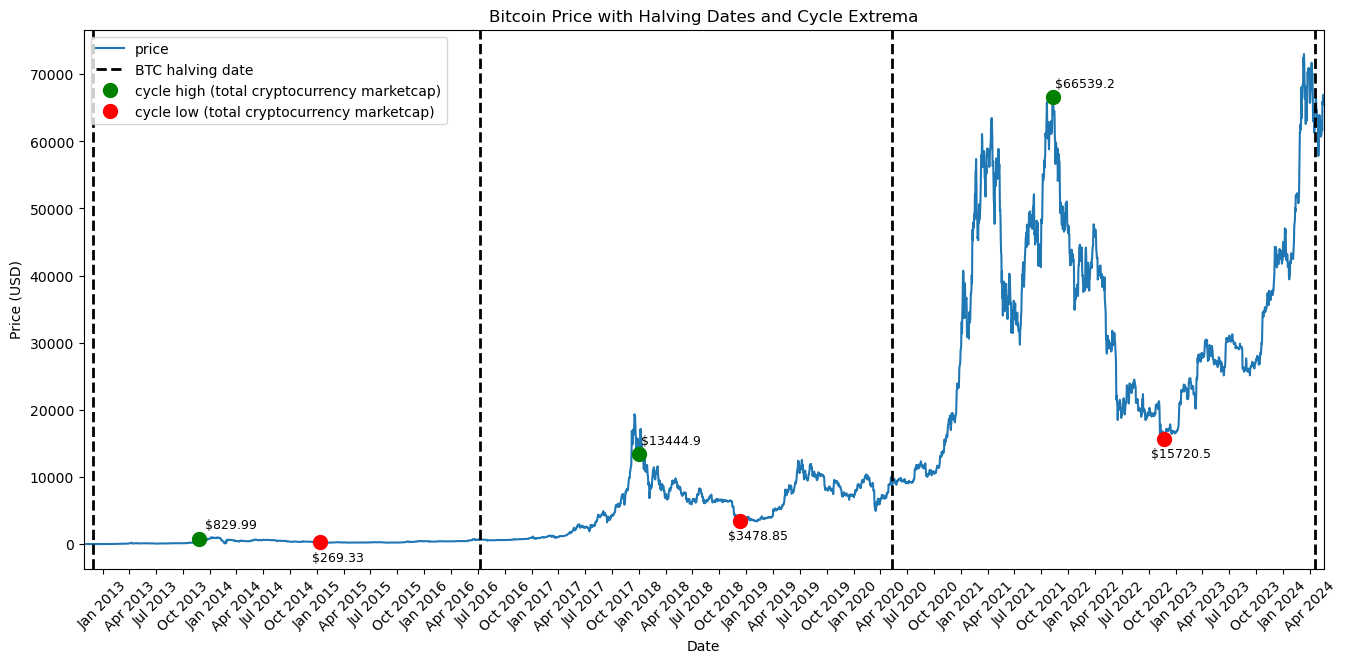

In [112]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,7))
bitcoin_prices.plot(kind='line')
plt.title("Bitcoin Price with Halving Dates and Cycle Extrema")
plt.xlabel('Date')
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  #xtick every 3 months.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

#The main plot is ready to be displayed, now let's add vertical dotted lines at the halving dates, and red/green dots at the cycle low/highs
#Recall our three lists of key dates were 'bitcoin_halving_dates', 'cycle_highs' and 'cycle_lows'
for date in bitcoin_halving_dates:
    plt.axvline(x=date, color='black', linestyle='--', linewidth=2, label ='BTC halving date') 
for date in cycle_highs:
    plt.plot(date, bitcoin_prices[date], 'go', markersize=10, label='cycle high (total cryptocurrency marketcap)')
    plt.text(date + pd.Timedelta(days=110), bitcoin_prices[date]+1500, f'${bitcoin_prices[date]}', color='black', fontsize=9, ha='center')
for date in cycle_lows:
    plt.plot(date, bitcoin_prices[date], 'ro', markersize=10, label='cycle low (total cryptocurrency marketcap)')
    plt.text(date + pd.Timedelta(days=60), bitcoin_prices[date]-2750, f'${bitcoin_prices[date]}', color='black', fontsize=9, ha='center')
    
#remove duplicates in the legend by passing them through a dictionary. Slightly preferred to adding logic into the for loops.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc = 'upper left')

plt.show()

Interestingly, at first glance the spacing between the halvings, cycle highs, and cycle lows look very similiar. Let us investigate this further. 

Let's call the three periods between the 4 halvings "cycle 1", "cycle 2", "cycle 3". For each of these cycles we produce a stacked bar chart displaying the number of days between the key dates, namely the cycle start date (i.e. the halving), the cycle high, the cycle low and the cycle end date (the next halving). 

To do this, we will create a "days_between" dataframe with indices ['cycle 1' 'cycle 2','cycle 3'] and columns "start to high", "high to low", and "low to end". We do this by first creating a dataframe with key dates for each cycle, then perform column arithmetic. We can then plot this as a stacked bar chart using plt.bar and the use of the 'bottom' paramter.

[]

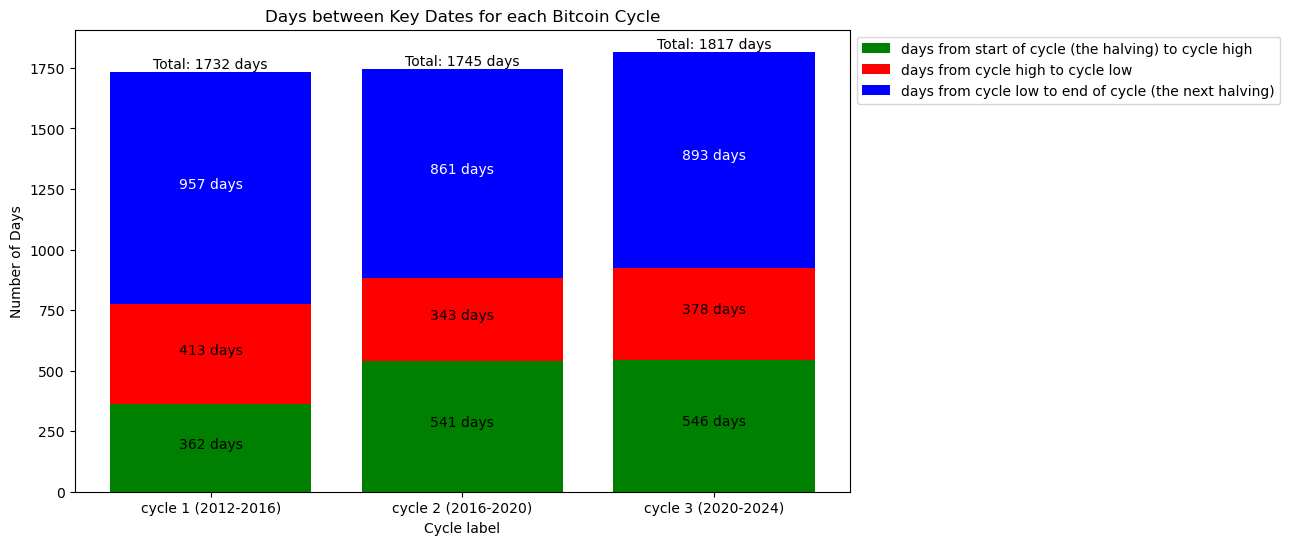

In [113]:
index = ['cycle 1 (2012-2016)','cycle 2 (2016-2020)','cycle 3 (2020-2024)']

#create start and end date lists by slicing the bitcoin_halving_dates list.
start_dates = bitcoin_halving_dates[:-1]
end_dates = bitcoin_halving_dates[1:]

cycle_info_df = pd.DataFrame(data={'start':start_dates, 'high':cycle_highs, 'low':cycle_lows, 'end':end_dates}, index = index)

days_between_df = pd.DataFrame(index=index) #create empty dataframe, ready to hold the column arithmetic performed on 'cycle_info_df'.

days_between_df['start to high'] = (cycle_info_df['high'] - cycle_info_df['start']).dt.days
days_between_df['high to low'] = (cycle_info_df['low'] - cycle_info_df['high']).dt.days
days_between_df['low to end'] = (cycle_info_df['end'] - cycle_info_df['high']).dt.days

plt.figure(figsize=(10,6))

green_bars = plt.bar(days_between_df.index, days_between_df['start to high'], color = 'green', label='days from start of cycle (the halving) to cycle high')
red_bars = plt.bar(days_between_df.index, days_between_df['high to low'], color = 'red', bottom= days_between_df['start to high'], label='days from cycle high to cycle low')
blue_bars = plt.bar(days_between_df.index, days_between_df['low to end'], bottom= days_between_df['start to high'] + days_between_df['high to low'], color = 'blue', label='days from cycle low to end of cycle (the next halving)')

for bar in green_bars + red_bars + blue_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height/2,f'{height} days', ha='center', color = 'white' if bar in blue_bars else 'black')
    if bar in blue_bars: #add text to the top of each stack displaying total days for the cycle        
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height+15,f'Total: {bar.get_y()+height} days', ha='center', color = 'black')

plt.title("Days between Key Dates for each Bitcoin Cycle")
plt.xlabel("Cycle label")
plt.ylabel('Number of Days')
plt.legend(bbox_to_anchor=(1, 1))
plt.plot()

One final interesting piece of data we will look at is what percentage of Bitcoin's gains from the cycle low to the next cycle high does it obtain by the halving date. There are only 2 samples for this, namely the period between the low of cycle 1 and the high of cycle 2, and the period between the low of cycle 2 and the high of cycle 3. 

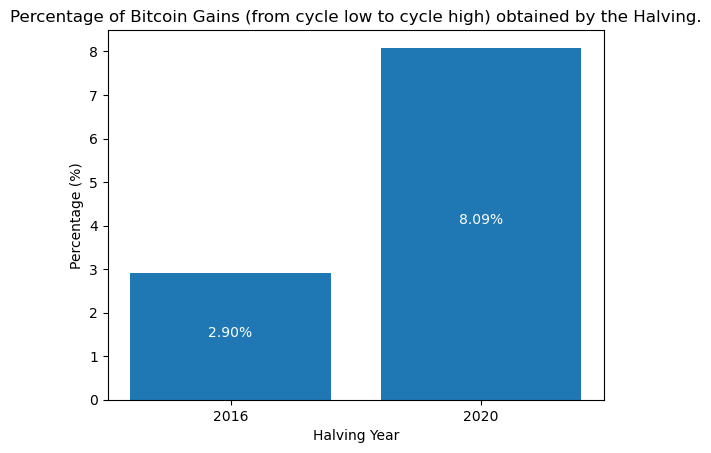

In [114]:
percent_by_2016_halving = (bitcoin_prices[bitcoin_halving_dates[1]] - bitcoin_prices[cycle_lows[0]])/(bitcoin_prices[cycle_highs[1]] - bitcoin_prices[cycle_lows[0]])*100
percent_by_2020_halving = (bitcoin_prices[bitcoin_halving_dates[2]] - bitcoin_prices[cycle_lows[1]])/(bitcoin_prices[cycle_highs[2]] - bitcoin_prices[cycle_lows[1]])*100

percentage_bar_chart = plt.bar(x=['2016','2020'],height=[percent_by_2016_halving,percent_by_2020_halving])
for bar in percentage_bar_chart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height/2,f'{height:.2f}%', ha='center', color = 'white')

plt.title("Percentage of Bitcoin Gains (from cycle low to cycle high) obtained by the Halving.")
plt.xlabel("Halving Year")
plt.ylabel("Percentage (%)")
plt.show()

# PART 2: Measuring the strength of altcoins in each cycle.

In this part, we aim to measure the strength of "altcoins" (that is, cryptocurrency tokens that are not BTC) in each of the three cycles. First of all, we need to define what we mean by "strength of an altcoin in a cycle". We will measure this as the **percentage change in price** from the cycle low to the cycle high (note: this is not necessarily the low and high of the price of the specific coin).

Another (a probably better way to define strength is via the **percentage change in marketcap** from the cycle low to the cycle high. However, obtaining historical marketcap data via free APIs for a large number of coins does not seem possible. Therefore we forget about this potential definition and stick with price.

First, we first need to fetch some data. Specifically, we want to fetch a list of cryptocurrencies. Due to restrictions in (free) APIs, we will restrict ourselves to a list of the (current) top 100 cryptocurrencies by marketcap. This will be the content of the next subsection.

## 2.1 Fetching data

We want to fetch the names of some cryptocurrencies. For this project, we will obtain a list of the top 100 coins by marketcap (as of the date of the API call below). We do this by utilising the CoinGecko public API (no key required).

In [115]:
import cryptocompare
import csv
import datetime
import requests
import scipy as sp
import time
from collections import defaultdict 

In [116]:
#Fetch a list of the top 100 coins by marketcap using the CoinGecko API.

url = "https://api.coingecko.com/api/v3/coins/markets"

headers = {"accept": "application/json"}

params = {'vs_currency': 'usd'}

response = requests.get(url, headers=headers,params = params)

top100 = response.json()

We now have a list of the top 100 cryptocurrencies by marketcap. In panda-esque fashion let's print the keys and the "head" of the data for some of the columns to see what we are dealing with. 

In [117]:
#keys of the API output

top100[0].keys()

dict_keys(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap', 'market_cap_rank', 'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h', 'market_cap_change_24h', 'market_cap_change_percentage_24h', 'circulating_supply', 'total_supply', 'max_supply', 'ath', 'ath_change_percentage', 'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi', 'last_updated'])

In [118]:
#head of the data for some selected columns

columns_to_print = ['id','symbol','current_price','market_cap','total_volume',]

for coin in top100[:5]:
    print({column: coin.get(column) for column in columns_to_print})
    print("")

{'id': 'bitcoin', 'symbol': 'btc', 'current_price': 62356, 'market_cap': 1228889435899, 'total_volume': 30287297576}

{'id': 'ethereum', 'symbol': 'eth', 'current_price': 2617.53, 'market_cap': 314538703784, 'total_volume': 12584361335}

{'id': 'tether', 'symbol': 'usdt', 'current_price': 1.0, 'market_cap': 117956348580, 'total_volume': 42684879037}

{'id': 'binancecoin', 'symbol': 'bnb', 'current_price': 550.15, 'market_cap': 80131780632, 'total_volume': 901577997}

{'id': 'solana', 'symbol': 'sol', 'current_price': 153.55, 'market_cap': 71448225849, 'total_volume': 3221473713}



From this data, we will extract the ticker/symbol for each coin. For later use, we will also create a symbol_to_id dictionary. 

Then, using the Crypto Compare API (https://min-api.cryptocompare.com/documentation) , we will fetch prices and marketcaps for the six cycle extrema, as well as the present day. We will produce a pandas dataframe from this data, and using column arthmetic will calculate the percentage change in price and marketcap for each coin through each cycle. Using data analysis techniques we will study this data.

In [119]:
symbol_to_id = {coin['symbol']: coin['id'] for coin in top100}

coin_tickers = [coin['symbol'].upper() for coin in top100]

In [120]:
#For security, we read private API keys in from an external .csv file.
API_keys_dict = dict(csv.reader(open('APIkeys.csv', 'r')))

#Try to set the cryptocompare API key to our own from the .csv.
try:
    cryptocompare.cryptocompare._set_api_key_parameter(API_keys_dict['CryptoCompare'])
except KeyError as k:
    print(f"{k} is not a key in API_keys_dict. Check spelling and/or add an API key for Crypto Compare.")

In [121]:
key_dates = {'2013_high':cycle_highs[0],
              '2015_low':cycle_lows[0],
              '2018_high':cycle_highs[1],
              '2018_low':cycle_lows[1],
              '2021_high':cycle_highs[2],
              '2022_low':cycle_lows[2],
              'present_day': pd.to_datetime(datetime.datetime.today())
             }

#Test API call, to see the output. 

test_ticker = coin_tickers[0] #This is 'BTC'
test_date = key_dates['2022_low'] #This is '21-11-2022'
test_call = cryptocompare.get_historical_price(test_ticker, 'USD', timestamp=test_date, exchange='CCCAGG')

print(f"The pair {test_ticker}/USD on {test_date} was {test_call}.")

The pair BTC/USD on 2022-11-21 00:00:00 was {'BTC': {'USD': 15760.19}}.


So, the output is a dict with values in a dict, explicity of the form {ticker, {currency: price}. Therefore, price can be retrieved via 'output[ticker][currency]'. We now loop through all tickers from our top100 list, as well as each key date, and add all the data to a dictionary.

Note: The below code will be run once, with the results being converted to a dataframe and saved to a .csv. After this, the code will be commented out to avoid unneccessary and excessive API calls.

In [122]:
# import time

# historical_prices = defaultdict(list)

# finish_time = time.time() - 1 #initialise to a time >0.3 seconds ago.

# for ticker in coin_tickers:
#     historical_prices['coin_ticker'].append(ticker)
#     for date_label,date in key_dates.items():
#         while time.time() - finish_time < 0.3:
#             #wait until time elaped is >= 0.3 seconds to not excede the free API usage limit
#             pass
#         call = cryptocompare.get_historical_price(ticker, 'USD', timestamp=date, exchange='CCCAGG')
#         finish_time = time.time()
#         try:
#             historical_prices[date_label].append(call[ticker]['USD'])
#         except Exception:
#             historical_prices[date_label].append(None)

# # Output summary from API calls: No data for 'WSETH', 'EZETH, 'EETH', 'RSETH', and 'any of the toSymbols USD'

# # create dataframe and write to a .csv file. 
# # This csv contains information from the API calls

# historical_prices_df = pd.DataFrame(historical_prices)
# historical_prices_df.to_csv('historical_prices_raw.csv', index=False)

## 2.2: A short clean of the data, and analysis.

We now have a file called 'historical_prices_raw.csv' containing historical prices of the top 100 coins. However, a quick look at this file shows many missing values. In this section we will clean this data; for some coins this will involve manually adding data, for others removing the coin completely. 

In [123]:
historical_prices_raw_df = pd.read_csv('historical_prices_raw.csv')

#creates a boolean mask based on whether each row contains any NaN values or not. 
#We wish to view the rows with NaN values so that we can analyse them manually.
row_contains_na_mask = historical_prices_raw_df.isna().any(axis = 1)

print(historical_prices_raw_df[row_contains_na_mask])

   coin_ticker  2013_high  2015_low  2018_high  2018_low  2021_high  2022_low  \
12      WSTETH        NaN       NaN        NaN       NaN        NaN       NaN   
16        WETH        NaN       NaN        NaN       NaN        NaN       NaN   
42         MNT        NaN       NaN        NaN       NaN        NaN       NaN   
55        RETH        NaN       NaN        NaN       NaN        NaN       NaN   
65       EZETH        NaN       NaN        NaN       NaN        NaN       NaN   
81        EETH        NaN       NaN        NaN       NaN        NaN       NaN   
83         FTN        NaN       NaN        NaN       NaN        NaN       NaN   
95       RSETH        NaN       NaN        NaN       NaN        NaN       NaN   

    present_day  
12          NaN  
16          NaN  
42          NaN  
55          NaN  
65          NaN  
81          NaN  
83          NaN  
95          NaN  


Of the eight coins which no price data, six of them are variants of ETH (wrapped ETH, tokens representating staked ETH etc). The other two, MNT (Mantle) and FTN (Fasttoken) have been tracked (by CoinMarketCap and CoinGecko) since July 2023 and January 2023 respectively. As this is after the 2022 low, so there is no harm in removing them as we cannot do much long term analysis on them.

A quick look at 'historical_prices_raw.csv' shows that the prices of some coins at key dates are 0. This is essentially synonymous with the coin not existing at said key date. Therefore, our first piece of analysis will be finding out how many coins in the current top 100 (or rather 92 of the top 100, after removing the above coins) existed at each cycle extrema, and trivially, present day.

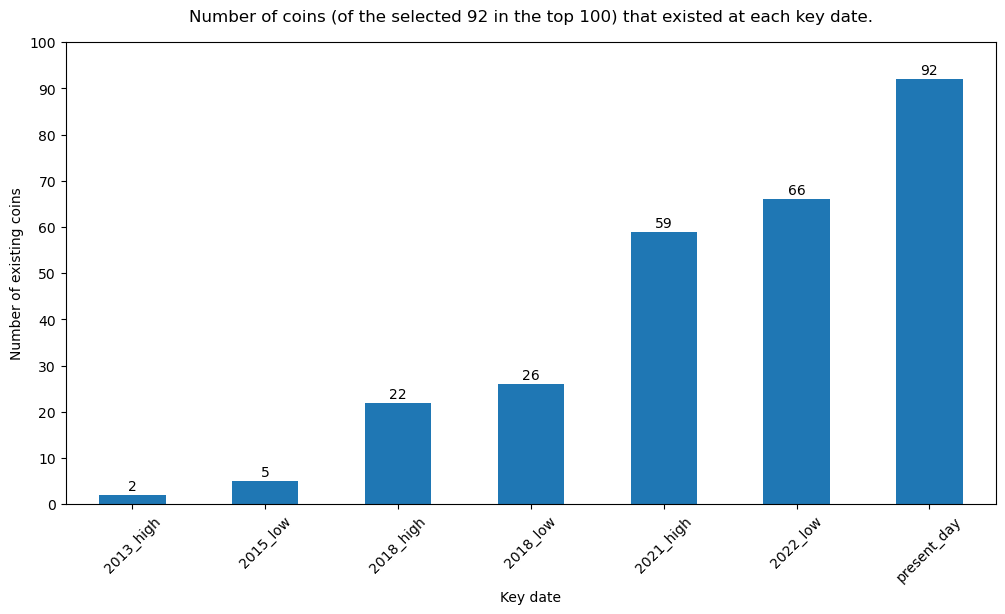

In [124]:
historical_prices_df = historical_prices_raw_df[~row_contains_na_mask]

num_existing_coins_per_date = historical_prices_df.map(lambda x: x!=0).sum().drop('coin_ticker')

plt.figure(figsize=(12,6))
existing_coins_bar = num_existing_coins_per_date.plot(kind='bar')
plt.title("Number of coins (of the selected 92 in the top 100) that existed at each key date.",pad=15)

for bar in existing_coins_bar.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height+1,f'{height:.0f}', ha='center', color = 'black')
    
plt.xlabel("Key date")
plt.ylabel("Number of existing coins")
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))
plt.show()

Strikingly, 26 of the coins in our selected 92 did not exist in the 2022 low. Moreover, at the latest cycle high (in 2021) only 59 of our selected 92 coins existed. This highlights how rapdily changing the cryptocurrency space is, both with how quickly a coin can gain traction, but also how quickly a coin can fall off if its use cases and/or technology becomes outdated.

Moreover, observe that very little coins come into existence between a cycle high and a cycle low, with most coins being created when the market is "on its way up". This is likely due to the fact that currency developers want to take advantage of a booming market to rapidly increase adoption of their currency in its early life.

Next, we will analyse the increase in price (to the nearest percentage) between the following three time periods (for the coins that existed):

* 2015 low - 2018 high
* 2018 low - 2021 high
* 2022 low - present day.

There is a slight caveat, namely coins that were created between a previous high and the cycle low may see huge percetnage gains from the cycle low to the cycle high. This is, in part, because at the cycle low the coin was so young. We will redemy this by instead only looking at coins for each cycle low to cycle high that existed during the previous cycle high.

This will give us an idea of how "strong" a coin was during a timeperiod, relative to the others, whilst ignoring coins that are "too new".

In [125]:
existed_2013_high_mask = historical_prices_df['2013_high'] != 0 
existed_2013_high_df = historical_prices_df[existed_2013_high_mask].copy()
existed_2013_high_df['change_percent_2015_to_2018'] = ((existed_2013_high_df['2018_high']/existed_2013_high_df['2015_low']-1)*100).round(0).astype(int)

existed_2018_high_mask = historical_prices_df['2018_high'] != 0 
existed_2018_high_df = historical_prices_df[existed_2018_high_mask].copy()
existed_2018_high_df['change_percent_2018_to_2021'] = ((existed_2018_high_df['2021_high']/existed_2018_high_df['2018_low']-1)*100).round(0).astype(int)

existed_2021_high_mask = historical_prices_df['2021_high'] != 0 
existed_2021_high_df = historical_prices_df[existed_2021_high_mask].copy()
existed_2021_high_df['change_percent_2022_to_present'] = ((existed_2021_high_df['present_day']/existed_2021_high_df['2022_low']-1)*100).round(0).astype(int)

[]

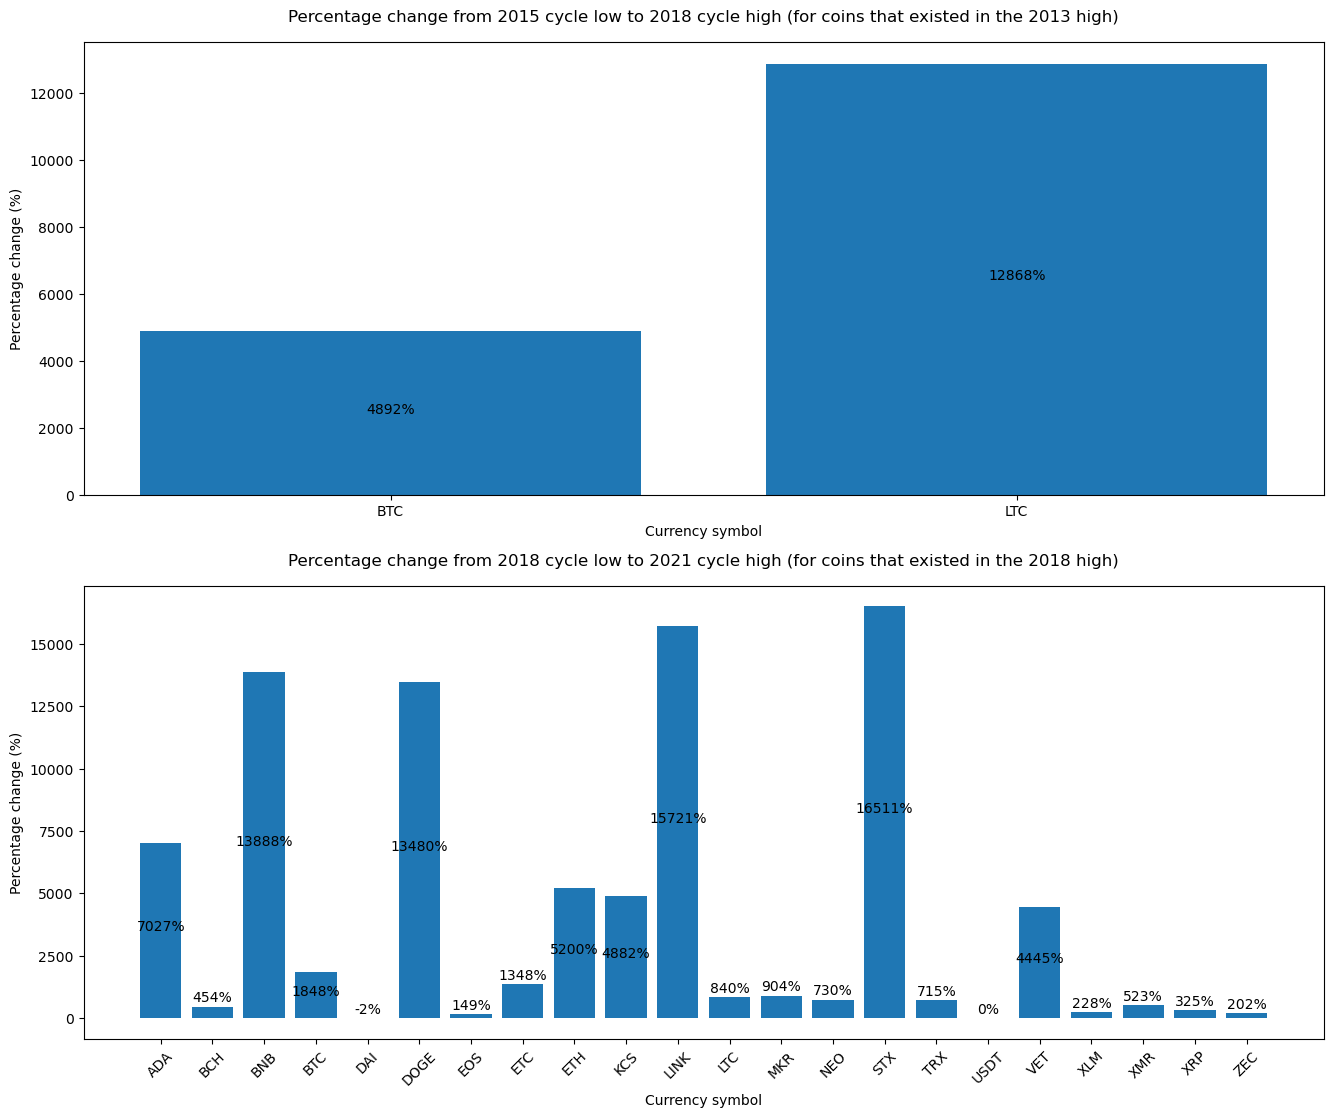

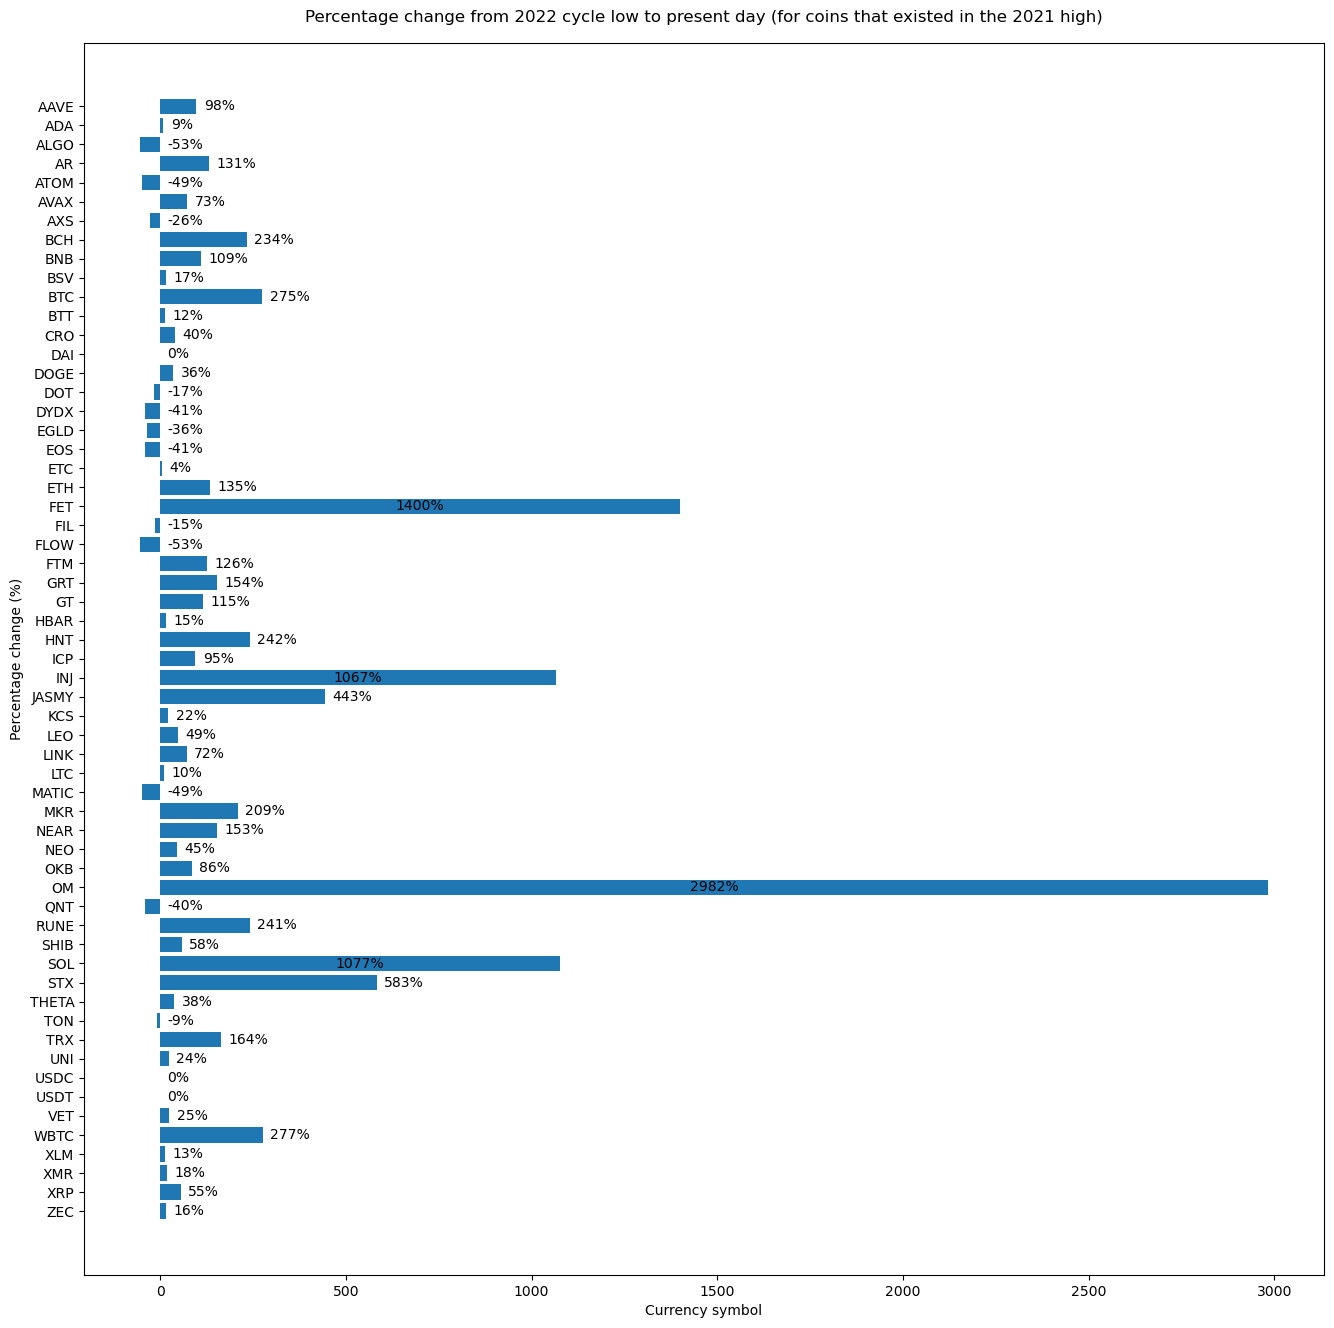

In [126]:
plt.figure(figsize = (16,20))

plt.subplot(3,1,1)
bar_change_2015_2018 = plt.bar(existed_2013_high_df['coin_ticker'],existed_2013_high_df['change_percent_2015_to_2018'])
for bar in bar_change_2015_2018:
    height = bar.get_height()
    if abs(height) < 5 : #in this case, the bars are small relative to the tallest bar, and so we label these bars above the bar as opposed to in the center of it. 
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height+200,f'{height:.0f}%', ha='center', color = 'black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height/2,f'{height:.0f}%', ha='center', color = 'black')
plt.title("Percentage change from 2015 cycle low to 2018 cycle high (for coins that existed in the 2013 high)",pad=15)
plt.ylabel("Percentage change (%)")
plt.xlabel("Currency symbol")

plt.subplot(3,1,2)
bar_change_2018_2021 = plt.bar(existed_2018_high_df.sort_values('coin_ticker')['coin_ticker'],existed_2018_high_df.sort_values('coin_ticker')['change_percent_2018_to_2021'])
for bar in bar_change_2018_2021:
    height = bar.get_height()
    if abs(height) < 1400 : #in this case, the bars are small relative to the tallest bar, and so we label these bars above the bar as opposed to in the center of it. 
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height+200,f'{height:.0f}%', ha='center', color = 'black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height/2,f'{height:.0f}%', ha='center', color = 'black')
plt.title("Percentage change from 2018 cycle low to 2021 cycle high (for coins that existed in the 2018 high)",pad=15)
plt.ylabel("Percentage change (%)")
plt.xlabel("Currency symbol")
plt.xticks(rotation=45)

#Due to the number of our coins existing as of 2022, we plot this graph on a horizontal bar chart.
plt.figure(figsize = (16,16))
bar_change_2022_present = plt.barh(existed_2021_high_df.sort_values('coin_ticker', ascending = False)['coin_ticker'],
                                   existed_2021_high_df.sort_values('coin_ticker', ascending = False)['change_percent_2022_to_present'])
for bar in bar_change_2022_present:
    width = bar.get_width()
    if abs(width) < 1000:  # For small bars, position the text at the end of the bar
        plt.text(max(0,width) + 20, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', ha='left', va='center', color='black')
    else: 
        plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', ha='center', va='center', color='black')
plt.title("Percentage change from 2022 cycle low to present day (for coins that existed in the 2021 high)",pad=15)
plt.ylabel("Percentage change (%)")
plt.xlabel("Currency symbol")
plt.plot()



So far in our dataframes, we have not opted to set the index to be the coin ticker. This is because the index currently tells us the ranking of each coin by marketcap. As this ranking is based on present day, let us plot percentage change from the 2021 low to present day against the coins ranking to see if there is any correlation. 

In order to try and observe a trend based on the majority of coins, let us ignore outliers, these will be coins with a greater than 1000% change.

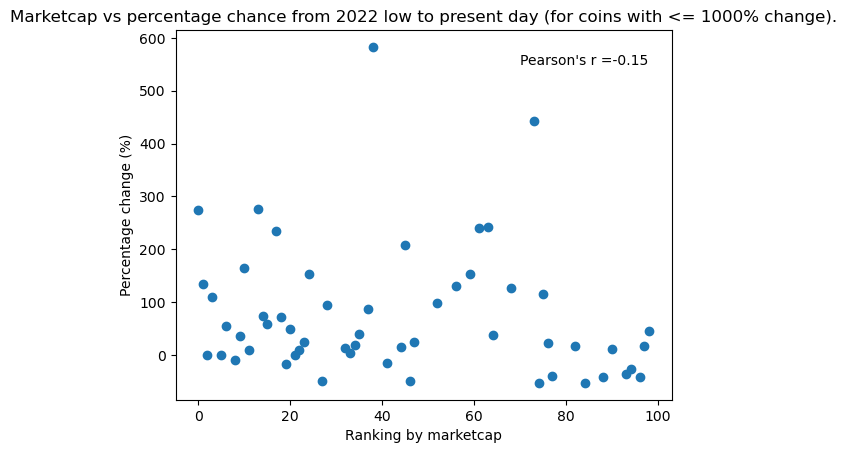

In [127]:
existed_2021_high_df_capped = existed_2021_high_df[abs(existed_2021_high_df['change_percent_2022_to_present']) <= 1000]

plt.scatter(existed_2021_high_df_capped.index, existed_2021_high_df_capped['change_percent_2022_to_present'])
plt.title("Marketcap vs percentage chance from 2022 low to present day (for coins with <= 1000% change).")
plt.ylabel("Percentage change (%)")
plt.xlabel("Ranking by marketcap")

r, p = sp.stats.pearsonr(x=existed_2021_high_df_capped.index, y = existed_2021_high_df_capped['change_percent_2022_to_present'])
plt.text(70, 550, "Pearson's r ={:.2f}".format(r))
plt.show()

So, there is basically no correlation between a coin's ranking by marketcap and its percentage change since the cycle low in 2022. 


The last piece of analysis we will do regarding altcoins is to compare their percentage change from the 2022 low to present day v.s. their "category" (e.g. L1, L2, DeFi, DePin, RWA, ...). We do this via the CoinGecko API, which for a given coin id (we will use our symbol_to_id dictionary which was created following the previous CoinGecko API call) returns a plethera of information, including the coin's categories.

Once again, to avoid excessive calls to the API, we will do the call once, and then save the results to a .csv. 

In [128]:
# #To avoid an oversaturation of categories, we pre-define a list of categories that we try to fit each coin into
# list_of_categories =['Layer 1 (L1)', 'Proof of Work (PoW)', 'Stablecoins', 'Decentralized Finance (DeFi)', 
#                      'Meme', 'Wrapped-Tokens', 'DePIN',  'Layer 2 (L2)', 'NFT', 'Decentralized Exchange (DEX)', 'Gaming', 'Real World Assets (RWA)']

# def category_from_coin_ticker(coin_ticker):
#     ''' 
#     Takes a coin ticker and returns the coin's main category. This is done using the CoinGeckoAPI.
#     Input: coin_ticker: str
#     Output coin_category: str
#     '''    
    
#     coin_id = symbol_to_id[coin_ticker.lower()]
#     url = f"https://api.coingecko.com/api/v3/coins/{coin_id}?x_cg_demo_api_key={API_keys_dict['CoinGecko']}"
#     headers = {"accept": "application/json"}
#     response = requests.get(url, headers=headers).json()
    
#     time.sleep(2) #CoinGecko demo API has a limit of 30 calls per minute, so we wait 2 seconds.
    
#     for cat in response['categories']:
#         if cat in list_of_categories:
#             return cat
#     #none of the coin's categories were in list_of_categories. Therefore just return the first category from the API call.
#     return response['categories'][0]

# existed_2021_high_df['category'] = existed_2021_high_df['coin_ticker'].apply(category_from_coin_ticker)

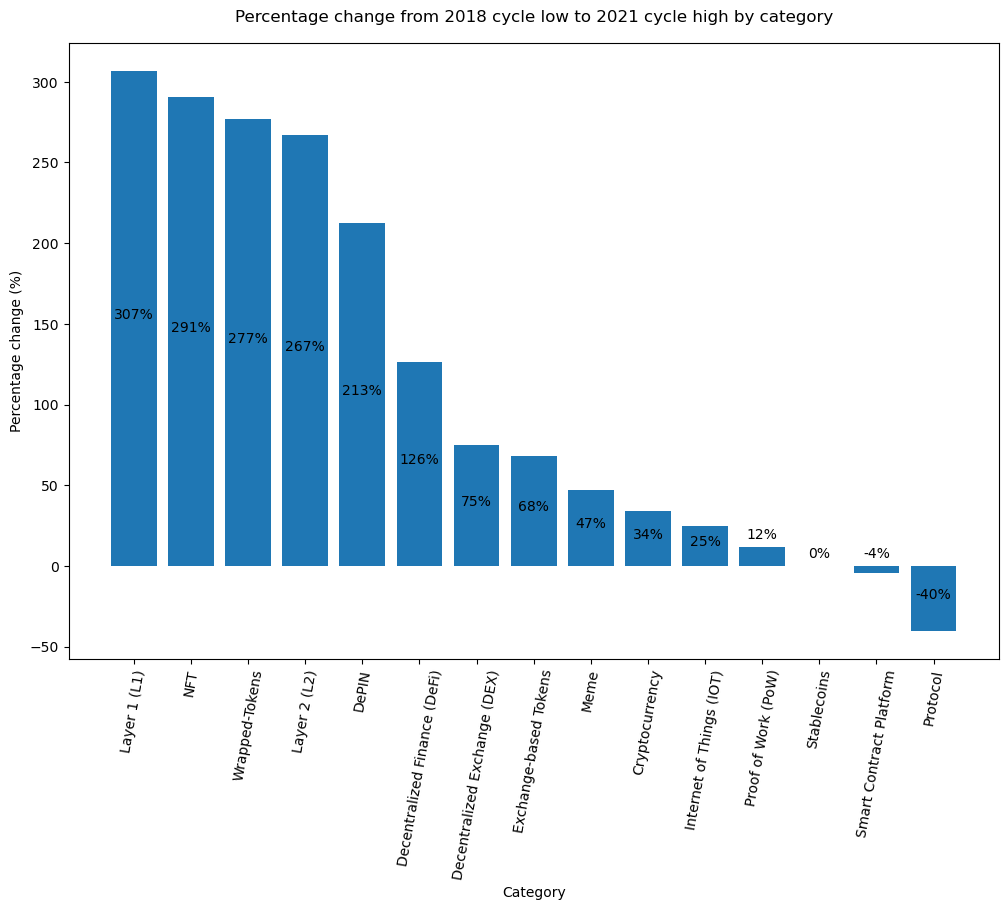

In [129]:
#read in the .csv we created using the above API call, these steps avoid excessive calls to the API.

existed_2021_high_df = pd.read_csv('existed_2021_with_categories.csv')

group_by_category = existed_2021_high_df.groupby('category')

average_percent_change_by_category = group_by_category['change_percent_2022_to_present'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
bar_change_by_category = plt.bar(average_percent_change_by_category.index, average_percent_change_by_category)
for bar in bar_change_by_category:
    height = bar.get_height()
    if abs(height) < 25 : #in this case, the bars are small relative to the tallest bar, and so we label these bars above the bar as opposed to in the center of it. 
        plt.text(bar.get_x() + bar.get_width() / 2, max(0,height)+5,f'{height:.0f}%', ha='center', color = 'black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+height/2,f'{height:.0f}%', ha='center', color = 'black')
plt.title("Percentage change from 2018 cycle low to 2021 cycle high by category",pad=15)
plt.ylabel("Percentage change (%)")
plt.xlabel("Category")
plt.xticks(rotation=80)
plt.show()

# PART 3: Bitcoin price vs the Fear and Greed Index.

In the final part of this project, we examine the correlation between Bitcoin's price and the crypto fear and greed index (https://alternative.me/crypto/fear-and-greed-index/).



## 3.1 - The fear and greed index - obtaining data.

The fear and greed index "... \[analyses] emotions and sentiments from different sources and crunch\[es] them into one simple number". The data used comes from many sources, including volatility, bitcoin dominance, social media, trading volume. 

To retrieve information on the fear and greed index, we use the free public fear and greed index API (https://alternative.me/crypto/fear-and-greed-index/#api).

The JSON output has the following format: The root keys are 'name', 'data' and 'metadata'. The 'data' key is what interests us, it is a list of dictionaries that have keys: 'value', 'value_classifcation', and 'timestamp'. We wish to extract 'timestamp' along with 'value' for each element in the list.

In [130]:
import requests
import datetime
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [131]:
response = requests.get('https://api.alternative.me/fng/?limit=0&date_format=world').json()

fear_and_greed_values_by_date = defaultdict(list)

for info in response['data']:
    fear_and_greed_values_by_date['date'].append(info['timestamp'])
    fear_and_greed_values_by_date['fear_greed_level'].append(int(info['value']))

fear_and_greed_df = pd.DataFrame(fear_and_greed_values_by_date).set_index('date')
fear_and_greed_df.index = pd.to_datetime(fear_and_greed_df.index, dayfirst=True) 
fear_and_greed = fear_and_greed_df['fear_greed_level']

#find minimum index i.e. earliest date contained in the data
earliest_date = fear_and_greed.index.min()
earliest_date

Timestamp('2018-02-01 00:00:00')

## 3.2 The comparison

We now plot the Bitcoin price chart alongside the Fear and Greed chart from the earliest date from which we have fear and greed data (1st Feburary 2018) to the present day. 

We then superimpose both charts, but with a twist, since the fear and greed is quite voliate day to day, we instead superimpose the bitcoin price with a moving average for the fear and greed, in hopes of smoothing the data somewhat. 

(Recall that our bitcoin historic data is stored in a DataFrame called 'bitcoin_historic'.)

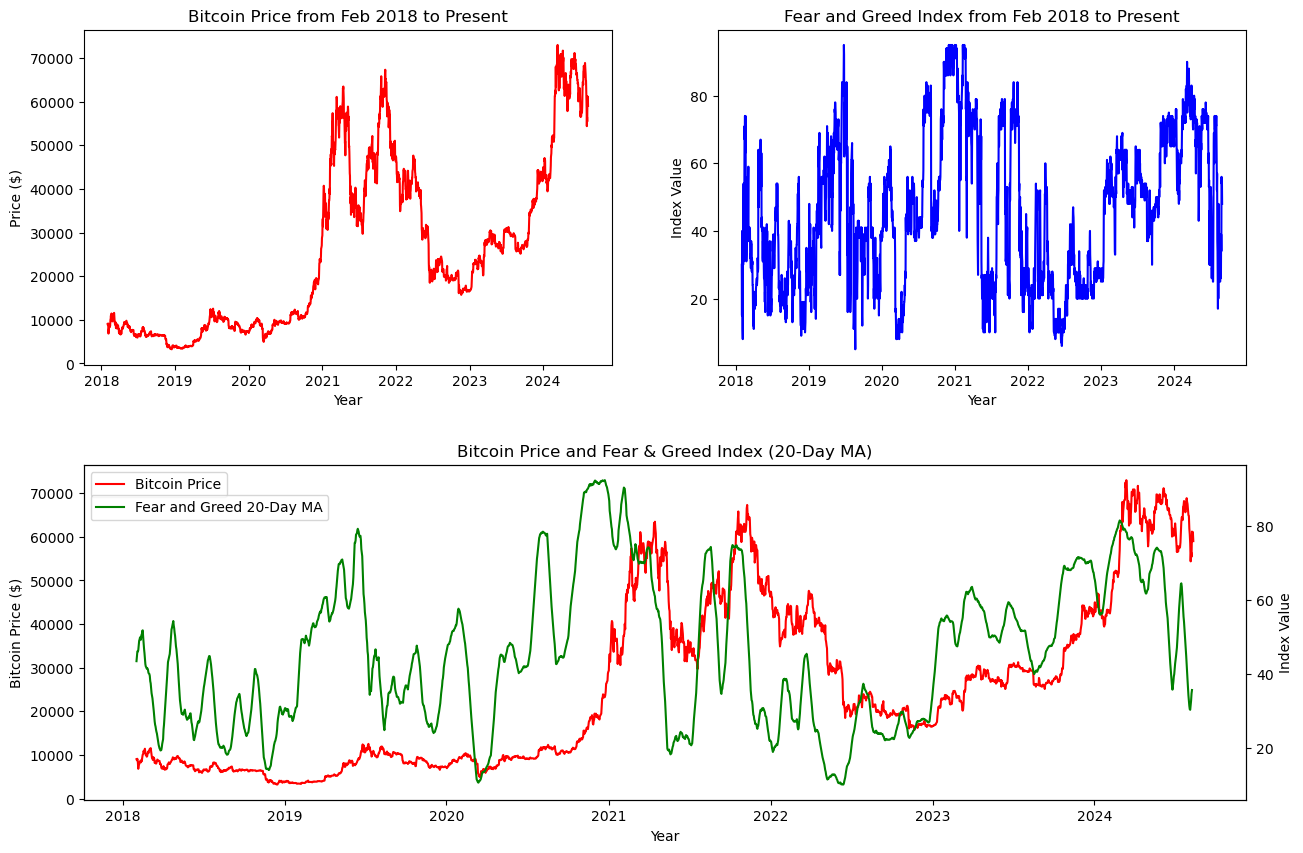

In [132]:
post_earliest_date_mask = (bitcoin_historic['date'] >= earliest_date)

bitcoin_historic_recent = bitcoin_historic[post_earliest_date_mask].set_index('date').sort_index()

bitcoin_prices_recent = bitcoin_historic_recent['close'].rename("price")

figure = plt.figure(figsize=(15,10))
gs = figure.add_gridspec(2,2)
plt.subplots_adjust(hspace=0.3)

axs_top_left = figure.add_subplot(gs[0,0])
axs_top_left.plot(bitcoin_prices_recent.index, bitcoin_prices_recent, 'r-')
axs_top_left.set_title('Bitcoin Price from Feb 2018 to Present')
axs_top_left.set_ylabel('Price ($)')
axs_top_left.set_xlabel('Year')

axs_top_right = figure.add_subplot(gs[0,1])
axs_top_right.plot(fear_and_greed_df.index, fear_and_greed, 'b-')
axs_top_right.set_title('Fear and Greed Index from Feb 2018 to Present')
axs_top_right.set_ylabel('Index Value')
axs_top_right.set_xlabel('Year')

fear_and_greed_20_day_MA = fear_and_greed.rolling(window=20).mean()

axs_bottom = figure.add_subplot(gs[1, :])
axs_bottom_twin = axs_bottom.twinx()
axs_bottom.set_title('Bitcoin Price and Fear & Greed Index (20-Day MA)')
axs_bottom.set_xlabel('Year')
axs_bottom.set_ylabel('Bitcoin Price ($)')
axs_bottom_twin.set_ylabel('Index Value')
axs_bottom_twin.set_yticks(range(0,100,20))

axs_bottom.plot(bitcoin_prices_recent.index, bitcoin_prices_recent, 'r-', label='Bitcoin Price')
axs_bottom.legend()

axs_bottom_twin.plot(fear_and_greed.index, fear_and_greed_20_day_MA, 'g-', label='Fear and Greed 20-Day MA')
axs_bottom_twin.legend(loc= 'upper left', bbox_to_anchor=(0, 0.93))

plt.show()

Let's get an idea of the number of days the fear and greed takes each value by grouping the data into bins of size 10, and taking value counts.

In [133]:
bins = range(0,101,10)
bin_labels = ['(0,10]']+[f'({d}0-{d+1}0]' for d in range(1,10)]

fear_and_greed_binned = pd.cut(fear_and_greed, bins=bins, labels=bin_labels, right=True)
fear_and_greed_binned.value_counts().sort_index()

fear_greed_level
(0,10]       37
(10-20]     254
(20-30]     460
(30-40]     313
(40-50]     345
(50-60]     299
(60-70]     240
(70-80]     320
(80-90]      70
(90-100]     59
Name: count, dtype: int64

## 3.3: The Fear and Greed Strategy

As a final piece of analysis (and just for fun), from roughly this point last cycle (around Oct 2020) to now, let's suppose 0.01 BTC is bought everyday the fear and greed is below 20, and covnersely, 0.01 BTC is sold everyday the fear and greed is above 75. 

How much would this strategy make compared to DCAing at regular intervals over the same time period?

In [134]:
import sys

bitcoin_prices_all = bitcoin_historic.set_index('date')['close'].rename("price")

start_date = pd.to_datetime('2020-10-1')#fear_and_greed.index.min()
end_date = pd.to_datetime('2024-08-11')
btc = 0
profit = 0 
buying_opps = 0
selling_opps = 0

date_range = pd.date_range(start=start_date, end=end_date)

for date in date_range:
    if date not in fear_and_greed.index:
        continue
    if fear_and_greed.loc[date] < 20:
        buying_opps +=1
        btc += 0.01      
        profit -= 0.01*bitcoin_prices_all[date]
    if fear_and_greed.loc[date] > 75:
        selling_opps +=1
        if btc >= 0.01:
            btc -= 0.01
            profit += 0.01*bitcoin_prices_all[date]
        elif btc > 0: #sell the rest.
            profit += btc*bitcoin_prices_all[date]
            btc = 0
            
btc = round(btc,2) #to remove any floating point errors.
profit = round(profit,2)
print(f"Buying 0.01 btc when fear and greed is below 20 would have resulted in {buying_opps} buying days, and selling 0.01 btc when fear and greed is above 75 would have resulted in {selling_opps} selling days.")
print(f"Overall this would have resulted in (assuming enough USD to buy at each buying opportunity, and not allowed to sell bitcoin that is not owned):")
print("")
print(f"Profit in cash: ${profit}")
print(f"Bitcoin holdings: {btc} BTC, with 1 BTC currently worth ${bitcoin_prices_all[end_date]} (as of {end_date.date()})")
print(f"Total profit (incl. the sale of the BTC at today's price): ${round(profit+btc*bitcoin_prices_all[end_date],2)}")
print("")

#DCAing Use np.linspace to obtain equally spaced intervals between our start and end date.
total_days = (end_date - start_date).days
deltas = np.linspace(0, total_days, buying_opps)
spaced_days = [start_date + datetime.timedelta(days=int(delta)) for delta in deltas]

dca_profit = 0
todays_btc_price = bitcoin_prices_all[end_date]
for day in spaced_days:
    dca_profit += 0.01*(todays_btc_price - bitcoin_prices_all[day])
print(f"Instead, DCAing at {buying_opps} regular intervals, and selling at today's price (as of 11th August 2024) would have resulted in total profit:")
print(f"${round(dca_profit,2)}")

Buying 0.01 btc when fear and greed is below 20 would have resulted in 95 buying days, and selling 0.01 btc when fear and greed is above 75 would have resulted in 188 selling days.
Overall this would have resulted in (assuming enough USD to buy at each buying opportunity, and not allowed to sell bitcoin that is not owned):

Profit in cash: $12620.58
Bitcoin holdings: 0.3 BTC, with 1 BTC currently worth $59015.7 (as of 2024-08-11)
Total profit (incl. the sale of the BTC at today's price): $30325.29

Instead, DCAing at 95 regular intervals, and selling at today's price (as of 11th August 2024) would have resulted in total profit:
$20306.71


The conclusion? "Be Fearful When Others Are Greedy And Greedy When Others Are Fearful" - Warren Buffett